In [1]:
import pandas as pd
import yfinance as yf
import sys
import os

sys.path.append(os.path.abspath("../Scripts"))
sys.path.append(os.path.abspath("../src"))

from Download_data import StockData
from data_preprocessing import DataPreprocessor
from eda import StockAnalysis

## Task 1: Preprocess and Explore the Data
### Load and Clean Data

In [2]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = "2015-07-01"
end_date = "2025-07-31"

# Create instance of StockData
stock_data = StockData(tickers, start_date, end_date)


In [3]:
df = stock_data.download_data()

c:\Users\Specter\Documents\Tenx_Academy\Week-11\Time-Series-Forecasting-Portfolio-Optimization\src\Download_data.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(self.tickers, start=self.start_date, end=self.end_date)
[*********************100%***********************]  3 of 3 completed


In [4]:
df.head()

Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816727  174.917145  17.943333  60.914452  175.363920   
2015-07-02  60.967056  174.756989  18.667999  61.027198  175.566249   
2015-07-06  61.177559  174.259583  18.648001  61.222668  175.043542   
2015-07-07  61.237728  175.355469  17.858667  61.470769  175.481910   
2015-07-08  61.410618  172.413498  16.997334  61.463240  174.293327   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764104  174.124747  17.856667  60.794175   
2015-07-02  18.830000  60.936986  174.335501  18.220667  60.936986   
2015-07-06  18.779333  61.057282  173.256441  18.420000  61.222668   
2015-07-07  18.346666  61.237728  172.059437  17.384666  61.410634   
2015-07-08  17.386667  61.312886  172.177466  16.954000  61.373028   

Price                               Volume                        
Ticker             SPY       TSLA      BND        SPY       TSLA  
Date                                                              
2015-07-01  175.111025  18.073999  5399300  135979900   31518000  
2015-07-02  175.397657  18.680000  1060100  104373700  107458500  
2015-07-06  173.458760  18.591999  2210700  117975400   61828500  
2015-07-07  174.461918  18.333332  4183200  173820200   91576500  
2015-07-08  174.006719  17.288000  1967800  164020100   93316500

In [5]:
# Extract different price categories into separate DataFrames.
close_df, high_df, low_df, open_df, volume_df = stock_data.extract_price_categories()

In [6]:
# Reset index of DataFrames.
close_df, high_df, low_df, open_df, volume_df = stock_data.reset_indexes()

In [7]:
close_df, high_df, low_df, open_df, volume_df = stock_data.melt_data()

In [8]:
# Get the merged DataFrame
stock_data.merge_data()
df_merged = stock_data.get_merged_data()

In [9]:
df_merged.head()

,Date,Ticker,Open,Low,Volume,High,Close
0,2015-07-01,TSLA,18.073999,17.856667,31518000,18.174667,17.943333
1,2015-07-02,TSLA,18.680000,18.220667,107458500,18.830000,18.667999
2,2015-07-06,TSLA,18.591999,18.420000,61828500,18.779333,18.648001
3,2015-07-07,TSLA,18.333332,17.384666,91576500,18.346666,17.858667
4,2015-07-08,TSLA,17.288000,16.954000,93316500,17.386667,16.997334


###  Data cleaning and Understanding

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7605 entries, 0 to 7604
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7605 non-null   datetime64[ns]
 1   Ticker  7605 non-null   object        
 2   Open    7605 non-null   float64       
 3   Low     7605 non-null   float64       
 4   Volume  7605 non-null   int64         
 5   High    7605 non-null   float64       
 6   Close   7605 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 416.0+ KB


In [11]:
# Summary statistics
df_merged.describe()

,Date,Open,Low,Volume,High,Close
count,7605,7605.000000,7605.000000,7.605000e+03,7605.000000,7605.000000
mean,2020-07-12 16:49:59.289940992,178.199177,176.439129,6.788282e+07,179.837741,178.208641
min,2015-07-01 00:00:00,9.488000,9.403333,0.000000e+00,10.331333,9.578000
25%,2018-01-04 00:00:00,64.726095,64.633108,5.890700e+06,64.791238,64.718086
50%,2020-07-14 00:00:00,94.400665,91.734001,6.240820e+07,97.666664,94.571335
75%,2023-01-19 00:00:00,264.350006,261.211439,9.666270e+07,267.309998,264.350006
max,2025-07-30 00:00:00,638.349976,635.539978,9.140820e+08,638.669983,637.099976
std,NaN,151.799506,150.457747,6.784301e+07,153.033414,151.805674


In [12]:
# Count missing values per column
df_merged.isnull().sum()

Date      0
Ticker    0
Open      0
Low       0
Volume    0
High      0
Close     0
dtype: int64

In [13]:
df_merged.dtypes

Date      datetime64[ns]
Ticker            object
Open             float64
Low              float64
Volume             int64
High             float64
Close            float64
dtype: object

In [11]:
df_merged.Ticker.value_counts()

Ticker
TSLA    2535
BND     2535
SPY     2535
Name: count, dtype: int64

In [12]:
data = df_merged[['Date','Close']][df_merged['Ticker'] == 'TSLA']

In [13]:
data.to_csv('tsla.csv', index=False)

In [14]:
data = df_merged

In [15]:
data.Ticker.value_counts()

Ticker
TSLA    2535
BND     2535
SPY     2535
Name: count, dtype: int64

In [17]:
tsla = data[(data.Ticker=='TSLA')]

### Handling Duplicates

In [18]:
# Initialize the preprocessor
preprocessor = DataPreprocessor(tsla)

In [19]:
# Apply data cleaning and transformation steps
preprocessor.handle_duplicates()

Removed 0 duplicate rows.


### Check Outlier

In [20]:
preprocessor.check_outliers()

Outlier count per column: {'Open': np.int64(0), 'Low': np.int64(0), 'Volume': np.int64(176), 'High': np.int64(0), 'Close': np.int64(0)}


### Data Normalization

In [21]:
# Processed Data
processed_data = preprocessor.Normalized_data()
processed_data.head()

,Open,Low,Volume,High,Close,Date
0,0.018409,0.018865,0.023131,0.016401,0.017788,2015-07-01
1,0.019708,0.019677,0.107186,0.017772,0.019329,2015-07-02
2,0.019519,0.020122,0.056680,0.017666,0.019286,2015-07-06
3,0.018965,0.017811,0.089607,0.016761,0.017608,2015-07-07
4,0.016723,0.016850,0.091533,0.014754,0.015776,2015-07-08


### Conduct Exploratory Data Analysis (EDA):

In [22]:
# Sort index to ensure chronological order
df = processed_data

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df = df.set_index('Date')

# Sort by the new index
df = df.sort_index()

In [24]:
df.head()

,Open,Low,Volume,High,Close
Date,,,,,
2015-07-01,0.018409,0.018865,0.023131,0.016401,0.017788
2015-07-02,0.019708,0.019677,0.107186,0.017772,0.019329
2015-07-06,0.019519,0.020122,0.056680,0.017666,0.019286
2015-07-07,0.018965,0.017811,0.089607,0.016761,0.017608
2015-07-08,0.016723,0.016850,0.091533,0.014754,0.015776


In [25]:
# Initialize the analysis class
ts_analysis = StockAnalysis(df)

### Visualize Closing Prices

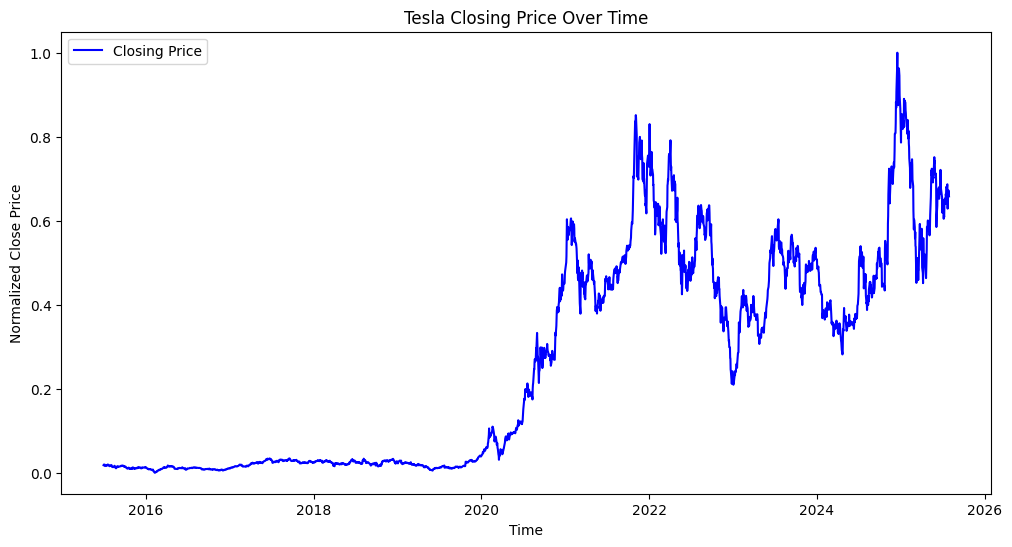

In [26]:
# Run Exploratory Data Analysis
ts_analysis.plot_closing_price()

### Calculate Daily Returns

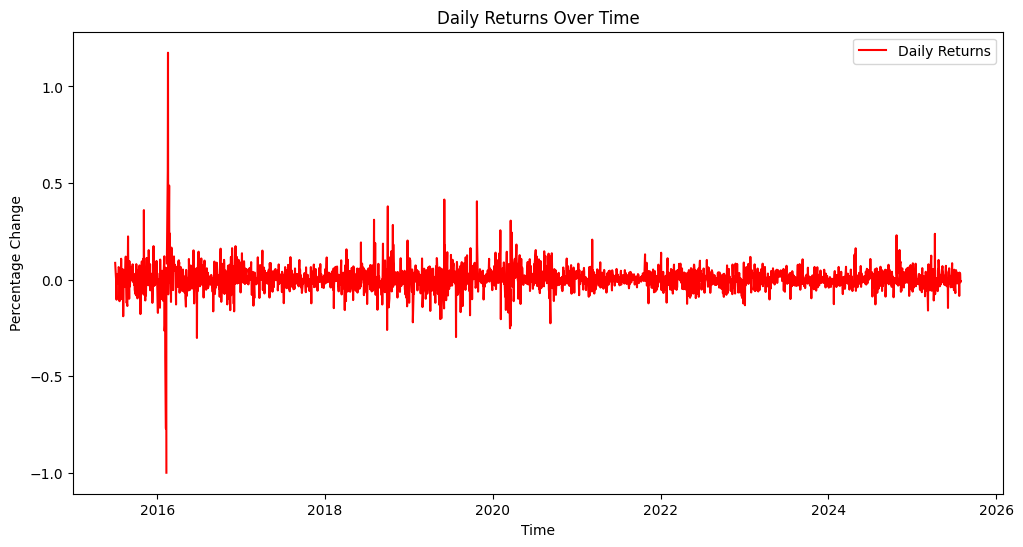

In [27]:
ts_analysis.calculate_daily_returns()

####  Performing outlier detection to identify significant anomalies

In [28]:
outliers = ts_analysis.detect_outliers()

Identified 30 outlier days with extreme returns.


In [29]:
outliers

,Date,Open,Low,Volume,High,Close,Daily Returns,Z-Score
40,2015-08-27,0.012675,0.013354,0.115356,0.012516,0.014079,0.223605,3.199757
88,2015-11-04,0.012104,0.012519,0.199539,0.010842,0.012469,0.359926,5.177664
148,2016-02-02,0.007161,0.005829,0.084103,0.005318,0.005544,-0.265816,-3.901336
149,2016-02-03,0.005899,0.004334,0.119929,0.004039,0.004226,-0.237791,-3.494721
151,2016-02-05,0.004142,0.002483,0.144936,0.002514,0.002683,-0.402085,-5.878493
152,2016-02-08,0.002113,0.000736,0.142867,0.000304,0.000612,-0.771791,-11.242627
154,2016-02-10,0.001169,0.000103,0.161022,0.000000,0.000000,-1.000000,-14.553759
157,2016-02-16,0.002341,0.001943,0.081118,0.001112,0.001630,0.560382,8.086127
158,2016-02-17,0.002384,0.002325,0.084960,0.002003,0.003545,1.174780,17.000535
161,2016-02-22,0.003974,0.004285,0.072257,0.003337,0.004830,0.487123,7.023196


### Decompose Tesla’s Stock Price (Trend, Seasonality, Residuals)

In [ ]:
# Perform Trend & Seasonality Analysis
ts_analysis.decompose_time_series()